# Informe Final Carrera
Profundiza y ajusta la resolución de tus proyectos: agrega al menos una fuente de datos o prueba un modelo que hasta el momento no hayas aplicado. Elabora un informe final que describa el proceso de toma de decisiones. Sustenta la razón por la cual usaste las librerías y aplicaste los métodos al dataset. Todos tus hallazgos deberán ser comunicados en función de la problemática y las preguntas que buscabas responder.

## Introducción

En el presente Proyecto, se trabajará con un **nuevo caso de estudio**, con una **nueva problemática**, no relacionada con los Proyectos anteriores presentados, por lo que en el repositorio de GitHub podrán encontrar el presente Notebook y el Archivo csv con el que se trabajará.

## Fraude Bancario

Se abordará la problemática del **Fraude Bancario**, el cual es un negocio de miles de millones de dólares y está aumentando cada año.  
A saber, una organización típica pierde aproximadamente el 5% de sus ingresos anuales debido al fraude.  
En un contexto de cambiante panorama bancario global, donde las redes de sucursales se están reduciendo, los volúmenes de pagos digitales aumentan y los pagos se procesan en segundos, los estafadores están encontrando creativamente nuevas formas de robar a los bancos y sus clientes.

De acuerdo a la [Encuesta Global de Fraude Bancario 2019](https://home.kpmg/cr/es/home/tendencias/2019/07/fraude_bancario.html) realizado por KPMG [1], podemos observar, entre los hallazgos principales, los siguientes:
* Más de la mitad de los encuestados en todo el mundo experimentaron aumentos tanto en el valor total como en el volumen del fraude externo. El aumento de las tipologías de fraude en todo el mundo desde 2015 hasta 2018 incluye el robo de identidad y la toma de posesión de la cuenta, los ataques cibernéticos, las tarjetas sin fraude y las estafas autorizadas de pago automático;
* Los bancos a nivel mundial están viendo una tendencia creciente en las estafas. Los estafadores están manipulando y obligando a los clientes a hacer pagos a ellos, sin pasar por los controles bancarios;
* La Banca Abierta se considera un desafío importante en el riesgo de fraude de los bancos, ya que los bancos de todo el mundo se están preparando para abrir sus puertas a terceros para acceder a los datos de sus clientes;
* Los estafadores son cada vez más sofisticados y pueden cambiar y adaptar rápidamente sus enfoques. Los bancos deben ser ágiles para responder a las nuevas amenazas y adoptar nuevos enfoques y tecnologías para predecir y prevenir el fraude;
* En cada región, los bancos encuestados consideraron que el desafío más importante en el riesgo de fraude son los ciberataques.

## ¿Por qué aplicar modelos ML para detectar Fraude Bancario?

Los algoritmos de **Machine Learning** (aprendizaje automático) procesan los datos en bruto (sin procesar), como correos electrónicos o mensajes de texto, y luego aprenden de lo que toman como entrada, volviéndose más inteligentes a lo largo del camino.  
Por otro lado, los **métodos basados en Reglas** no pueden detectar ningún patrón nuevo en los datos, ya que sólo siguen un escenario preestablecido, que no incluye patrones de actividad fraudulenta ligeramente modificados.

## BankSim Dataset

* A partir de ahora, se buscará detectar las transacciones fraudulentas del conjunto de datos de **BankSim**.  
* BankSim es un **simulador de pagos bancarios** basado en agentes, y en una muestra de datos transaccionales agregados, proporcionados por un banco en España.
* El objetivo principal de BankSim es la **generación de datos sintéticos** que se pueden utilizar para la investigación de detección de fraudes.
* Consiste en pagos de varios clientes hechos en diferentes períodos de tiempo y con diferentes cantidades.  
* Para mayor información sobre el conjunto de datos (originalmente nombrado 'bs140513_032310.csv'), se puede consultar la página de [Kaggle](https://www.kaggle.com/ntnu-testimon/banksim1) [2].  

Los pasos a seguir serán los siguientes:

1. [Análisis Exploratorio de Datos (EDA)](#1.-Análisis-Exploratorio-de-Datos)
2. [Preprocesamiento de Datos](#2.-Preprocesamiento-de-Datos)
3. [PCA (Principal Component Analysis)](#3.-PCA-(Principal-Component-Analysis))
4. [Sobremuestreo (Oversampling) con SMOTE](#4.-Sobremuestreo-(Oversampling)-con-SMOTE)
5. [Modelos de Machine Learning](#5.-Modelos-de-Machine-Learning)
6. [Comparación del Desempeño de los Modelos Desarrollados](#6.-Comparación-del-Desempeño-de-los-Modelos-Desarrollados)
7. [Conclusión](#7.-Conclusión)
8. [Recursos](#8.-Recursos)

### 1. Análisis Exploratorio de Datos

1. __Se importan las librerías__ necesarias para trabajar en la consigna.

In [1]:
import numpy as np # Para hacer cálculos numéricos con Python usando arrays
import pandas as pd # Para manipulación y análisis de datos con Python (por Ej. tablas numéricas)
import matplotlib.pyplot as plt # Herramienta de visualización
import seaborn as sns # Herramienta de visualización
sns.set() # interfaz preferida

2. __Se realiza la carga el dataset__ usando las funcionalidades de Pandas.

In [2]:
banksim = pd.read_csv('banksim.csv')

In [3]:
banksim.shape

(594643, 10)

* *El Dataset, cuenta con **594.643 Filas**, y **10 Columnas**.*

In [4]:
banksim.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


3. Se realiza una __descripción__ de las características:  

* *step:* representa el día desde el comienzo de la simulación. Tiene 180 pasos, por lo que la simulación dura virtualmente 6 meses. 
* *customer:* la identificación del cliente.  
* *age:* edad categorizada, las cuales se detallan a continuación:  
    * 0: <= 18,  
    * 1: 19-25,  
    * 2: 26-35,  
    * 3: 36-45,  
    * 4: 46-55,  
    * 5: 56-65,  
    * 6: > 65  
    * U: Desconocido  
* *gender:* género del cliente.  
    * E: Enterprise,  
    * F: Mujer,  
    * M: Hombre,  
    * U: Desconocido  
* *zipcodeOri:* el código postal de origen/fuente.  
* *merchant:* la identificación del comerciante.  
* *zipMerchant:* el código postal del comerciante.  
* *category:* categoría de la compra. A posteriori se verán con más detalle.  
* *amount:* monto (gasto) que implica la compra.  
* *fraud:* variable objetivo que muestra si la transacción es fraudulenta **(1)** o no **(0)**.

4. __Info por Columna:__ Se imprimen los nombres de cada columna, se observan sus valores faltantes y se identifica a qué tipo de dato corresponden.

In [5]:
banksim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


* *Ninguna columna tiene valores faltantes, lo cual es lógico por tratarse de un dataset sintético.*
* *Por ello, es que no será necesario realizar imputación de valores.*

5. Análisis del feature **Fraude**.

In [6]:
pd.unique(banksim['fraud'])

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Cantidad de Transacciones por Tipo')

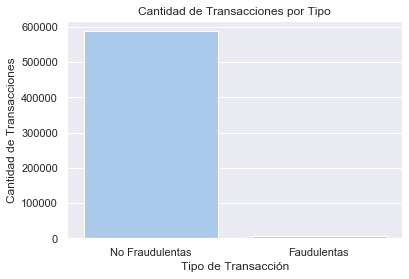

In [7]:
ax=sns.countplot(data = banksim, x = 'fraud', order = banksim['fraud'].value_counts().index, palette='pastel')
ax.set_xticklabels(["No Fraudulentas","Faudulentas"])
plt.xlabel('Tipo de Transacción');
plt.ylabel('Cantidad de Transacciones');
plt.title('Cantidad de Transacciones por Tipo')

* *Como se observa en el gráfico anterior, los datos de las transacciones en fraudulentas y no, según el recuento de instancias, se encuentran **desequilibrados**, siendo las transacciones no fraudulentas casi imperceptibles a la vista*.
* *Para equilibrar el conjunto de datos se pueden realizar **técnicas de sobremuestreo o submuestreo**.*  
* *El **sobremuestreo** es aumentar el número de la clase minoritaria, generando nuevas instancias de dicha clase.*  
* *El **submuestreo** consiste en reducir el número de instancias de la clase mayoritaria, mediante la selección de puntos aleatorios de la misma hasta que sea igual a la clase minoritaria.*  
* *Ambas operaciones tienen algunos **riesgos**: El sobremuestreo creará copias o puntos de datos similares que a veces no serían útiles para el caso de la detección de fraudes porque las transacciones fraudulentas pueden variar. El submuestreo significa que perdimos puntos de datos y, por lo tanto, información.*

In [8]:
print(banksim['fraud'].value_counts().sum())

594643


In [9]:
print(banksim['fraud'].value_counts())

0    587443
1      7200
Name: fraud, dtype: int64


* *Vemos que las instancias no fraudulentas representan un 98,8% del total, pudiendo corroborarse el desbalanceo del dataset.*

6. Análisis del **Fraude por Categoría**.

In [10]:
print(banksim['category'].value_counts())

'es_transportation'        505119
'es_food'                   26254
'es_health'                 16133
'es_wellnessandbeauty'      15086
'es_fashion'                 6454
'es_barsandrestaurants'      6373
'es_hyper'                   6098
'es_sportsandtoys'           4002
'es_tech'                    2370
'es_home'                    1986
'es_hotelservices'           1744
'es_otherservices'            912
'es_contents'                 885
'es_travel'                   728
'es_leisure'                  499
Name: category, dtype: int64


* *Se cuenta con 15 tipos de categoría diferentes, siendo la más recurrente `es_transportation`, abarca el 85% de las transacciones.*

7. Análisis del **Fraude por Monto o Gasto**.

* *Confirmemos lo expuesto en el punto anterior, comprobando la cantidad de fraude y de no fraude que se ha tramitado.*

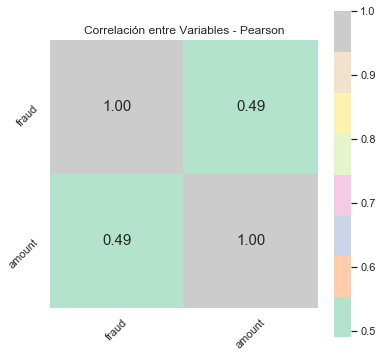

In [11]:
corr = banksim[['fraud','amount']].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap='Pastel2')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlación entre Variables - Pearson')
plt.show()

* *Existe una correlación positiva entre fraude y monto o gasto insumido en la trasacción, aunque no muy elevada.*

* *A continuación, se exponen el gasto promedio y el porcentaje de fraude por categoría.*

In [12]:
print("Gasto Promedio y Porcentaje de Fraude por Categoría",banksim.groupby('category')['amount','fraud'].mean())

Gasto Promedio y Porcentaje de Fraude por Categoría                               amount     fraud
category                                      
'es_barsandrestaurants'    43.461014  0.018829
'es_contents'              44.547571  0.000000
'es_fashion'               65.666642  0.017973
'es_food'                  37.070405  0.000000
'es_health'               135.621367  0.105126
'es_home'                 165.670846  0.152064
'es_hotelservices'        205.614249  0.314220
'es_hyper'                 45.970421  0.045917
'es_leisure'              288.911303  0.949900
'es_otherservices'        135.881524  0.250000
'es_sportsandtoys'        215.715280  0.495252
'es_tech'                 120.947937  0.066667
'es_transportation'        26.958187  0.000000
'es_travel'              2250.409190  0.793956
'es_wellnessandbeauty'     65.511221  0.047594


<ipython-input-12-ee65b36acd6c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print("Gasto Promedio y Porcentaje de Fraude por Categoría",banksim.groupby('category')['amount','fraud'].mean())


* *Parece que el ocio (`es_leisure`) y los viajes (`es_travel`) son las categorías más seleccionadas por los defraudadores.*
* *Los defraudadores eligieron las categorías en las que la gente **gasta más en promedio**.*

* *Para confirmar lo antes expuesto, se crean dos Dataframes diferenciando las transacciones fraudulentas de las que no lo son.*

In [13]:
fraudulentas = banksim.loc[banksim.fraud == 1] 
no_fraudulentas = banksim.loc[banksim.fraud == 0]

In [14]:
pd.concat([fraudulentas.groupby('category')['amount'].mean(),no_fraudulentas.groupby('category')['amount'].mean(),\
           banksim.groupby('category')['fraud'].mean()*100],keys=["Fraudulentas","No Fraudulentas","Porcentaje(%)"],axis=1,\
          sort=False).sort_values(by=['Porcentaje(%)'],ascending=False)

,Fraudulentas,No Fraudulentas,Porcentaje(%)
'es_leisure',300.286878,73.230400,94.989980
'es_travel',2660.802872,669.025533,79.395604
'es_sportsandtoys',345.366811,88.502738,49.525237
'es_hotelservices',421.823339,106.548545,31.422018
'es_otherservices',316.469605,75.685497,25.000000
'es_home',457.484834,113.338409,15.206445
'es_health',407.031338,103.737228,10.512614
'es_tech',415.274114,99.924638,6.666667
'es_wellnessandbeauty',229.422535,57.320219,4.759380
'es_hyper',169.255429,40.037145,4.591669


* *De acuerdo a lo observado anteriormente, podemos decir que para un determinado tipo de categoría, una transacción fraudulenta tendrá un gasto (`amount`) mucho mayor -unos cuatro veces o más-, que el gasto **promedio** para dicha categoría.*

* *Se trazan los box plots de los gastos realizados -de transacciones fraudulentas y no fraudulentas- por tipo de categoría.* 

No handles with labels found to put in legend.


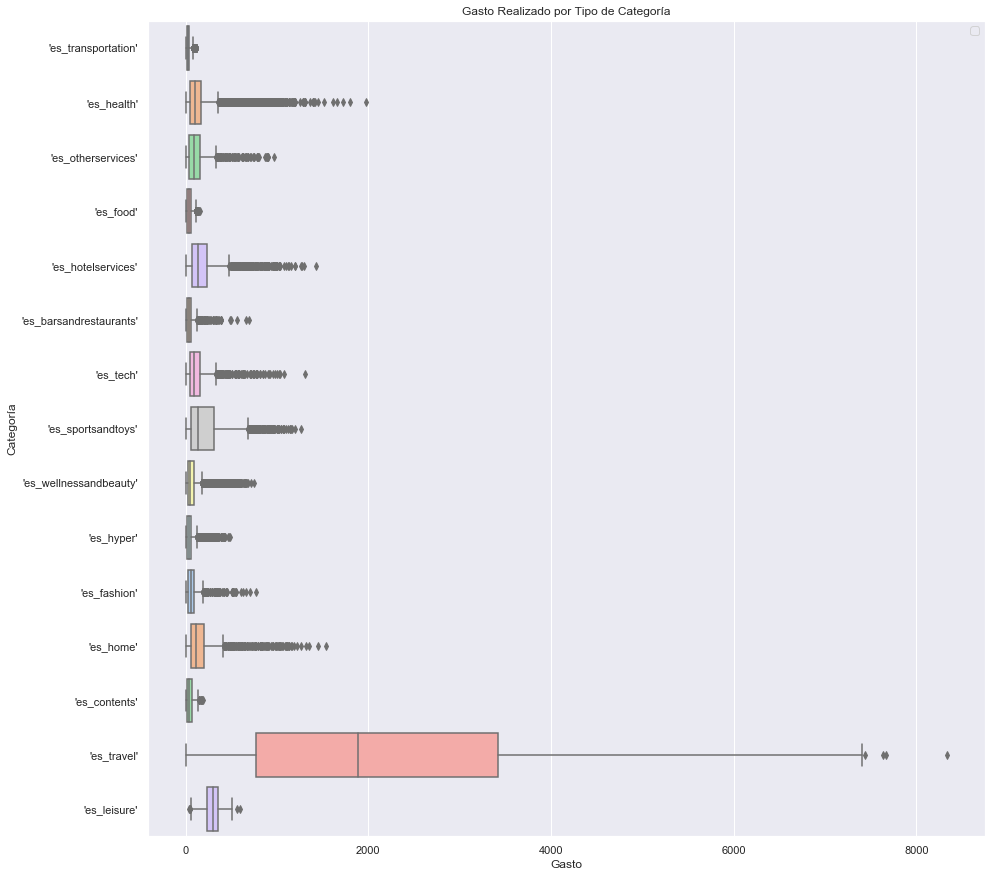

In [15]:
plt.figure(figsize=(15,15))
sns.boxplot(data = banksim, x = 'amount', y = 'category', palette='pastel')
plt.title("Gasto Realizado por Tipo de Categoría", fontsize=12)
plt.xlabel("Gasto",fontsize=12)
plt.ylabel("Categoría",fontsize=12)
plt.legend()
plt.show()

* *Las categorías tienen un gasto promedio similar, **entre 0 y 500** o **600** quizás (descartando los valores atípicos muy dispersos).*
* *La excepción observable, es la categoría de **viajes**, cuyo gasto se encuentra **muy por encima** de las demás categorías.*

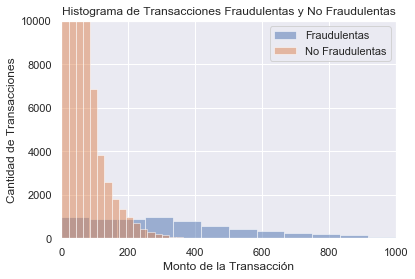

In [16]:
plt.hist(data = fraudulentas, x = 'amount', alpha=0.5, label='Fraudulentas',bins=100)
plt.hist(data = no_fraudulentas, x = 'amount', alpha=0.5, label='No Fraudulentas',bins=100)
plt.title("Histograma de Transacciones Fraudulentas y No Fraudulentas")
plt.xlabel('Monto de la Transacción');
plt.ylabel('Cantidad de Transacciones');
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.legend()
plt.show()

* *Una vez más podemos ver en el histograma, que las transacciones fradulentas son menos en cantidad pero más en monto.*
* *Con montos mayores a 400, ya poderíamos sospechar que hay fraude.*

8. Análisis del **Fraude por Edad**.

In [17]:
print(banksim['age'].value_counts())

'2'    187310
'3'    147131
'4'    109025
'5'     62642
'1'     58131
'6'     26774
'0'      2452
'U'      1178
Name: age, dtype: int64


* *Como vimos anteriormente, las transacciones se encuentran categorizadas por franjas etarias, y la categoría 'U' representa las edades desconocidas.*
* *La franjas que realizaron más transacciones, son las 2, 3 y 4 (en ese órden), es decir, aquellos que tienen entre 26 a 55 años, lo cual es lógico, ya que se trata de personas en edad laboral y que además se han adaptado al uso de herramientas tecnológicas.*

In [18]:
print((banksim.groupby('age')['fraud'].mean()*100).reset_index().rename(columns={'age':'Age','fraud' : 'Fraud Percent'}).sort_values(by='Fraud Percent'))

   Age  Fraud Percent
7  'U'       0.594228
6  '6'       0.974826
5  '5'       1.095112
1  '1'       1.185254
3  '3'       1.192815
2  '2'       1.251401
4  '4'       1.293281
0  '0'       1.957586


* *El fraude **ocurre más en edades iguales y menores de 18 años (0º categoría)**.*
* *Puede ser que los estafadores realmente sean jóvenes menores de 18 años, aunque lo más probable es que aquellos que comenten fraude, piensen que habría menos consecuencias si muestran su edad más joven.*

9. Análisis del feature **Pasos**.

In [19]:
print(banksim['step'].value_counts())

175    3774
177    3758
152    3746
178    3743
174    3743
       ... 
5      2525
3      2499
2      2462
0      2430
1      2424
Name: step, Length: 180, dtype: int64


* *Como se indicó anteriormente, `step` representa el día desde el comienzo de la simulación, abarcando 180 días (o 180 pasos).*
* *Por lo visto, la distribución de los datos por cada día parece bastante equilibrado, representando el día con más transacciones (día 175) un 0,6% del total, y el de menos operaciones (día 1) un 0,4%, y mostrando una evolución del número de transacciones del 0,03% mensual.*

10. Análisis del feature **Cliente**.

In [20]:
print(banksim['customer'].value_counts())

'C1978250683'    265
'C1275518867'    252
'C806399525'     237
'C515668508'     205
'C1338396147'    195
                ... 
'C1345586046'      6
'C1156745710'      6
'C1809646275'      5
'C1743702978'      5
'C1404665203'      5
Name: customer, Length: 4112, dtype: int64


* *Tenemos un total de 4.112 clientes.*
* *El cliente que mayor cantidad de transacciones realizó, es 'C1978250683', con 265 operaciones (lo cual representa un 0,04% de total de transacciones).*
* *`customer` no parece ser una variable determinante a la hora de establecer si una transacción es fraudulenta o no.*

11. Análisis de la variable **Género**.

In [21]:
print(banksim['gender'].value_counts())

'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: gender, dtype: int64


* *Los géneros Femenino y Masculino son los que más transacciones realizaron, es decir, que son personas físicas las que más operaciones efectuaron, mientras que son pocas las Empresas y mucho menos los géneros desconocidos.*

12. Análisis de los **Zip Codes**.

In [22]:
print(banksim['zipcodeOri'].value_counts())

'28007'    594643
Name: zipcodeOri, dtype: int64


In [23]:
print(banksim['zipMerchant'].value_counts())

'28007'    594643
Name: zipMerchant, dtype: int64


* *Como se observa, hay un sólo tipo de Zip Code, tanto de Origen como de Comerciante, por lo que luego, en el preprocesamiento de datos, los descartaremos.*

13. Análisis del feature **Comerciante**.

In [24]:
pd.unique(banksim['merchant'])

array(["'M348934600'", "'M1823072687'", "'M50039827'", "'M1888755466'",
       "'M1053599405'", "'M85975013'", "'M480139044'", "'M692898500'",
       "'M348875670'", "'M151143676'", "'M840466850'", "'M1741626453'",
       "'M1535107174'", "'M855959430'", "'M349281107'", "'M209847108'",
       "'M2122776122'", "'M1873032707'", "'M2011752106'", "'M857378720'",
       "'M1198415165'", "'M1748431652'", "'M980657600'", "'M1352454843'",
       "'M117188757'", "'M547558035'", "'M17379832'", "'M1649169323'",
       "'M1946091778'", "'M97925176'", "'M923029380'", "'M1353266412'",
       "'M1842530320'", "'M677738360'", "'M1313686961'", "'M732195782'",
       "'M1600850729'", "'M1872033263'", "'M3697346'", "'M495352832'",
       "'M1400236507'", "'M1294758098'", "'M1913465890'", "'M45060432'",
       "'M78078399'", "'M2080407379'", "'M1788569036'", "'M1416436880'",
       "'M933210764'", "'M1726401631'"], dtype=object)

In [25]:
print(banksim['merchant'].value_counts())

'M1823072687'    299693
'M348934600'     205426
'M85975013'       26254
'M1053599405'      6821
'M151143676'       6373
'M855959430'       6098
'M1946091778'      5343
'M1913465890'      3988
'M209847108'       3814
'M480139044'       3508
'M349281107'       2881
'M1600850729'      2624
'M1535107174'      1868
'M980657600'       1769
'M78078399'        1608
'M1198415165'      1580
'M840466850'       1399
'M1649169323'      1173
'M547558035'        949
'M50039827'         916
'M1888755466'       912
'M692898500'        900
'M1400236507'       776
'M1842530320'       751
'M732195782'        608
'M97925176'         599
'M45060432'         573
'M1741626453'       528
'M1313686961'       527
'M1872033263'       525
'M1352454843'       370
'M677738360'        358
'M2122776122'       341
'M923029380'        323
'M3697346'          308
'M17379832'         282
'M1748431652'       274
'M1873032707'       250
'M2011752106'       244
'M1416436880'       220
'M1294758098'       191
'M1788569036'   

* *Tenemos un total de 50 comerciantes.*
* *El comerciante que mayor cantidad de transacciones recibió, es 'M1823072687', con 299.693 operaciones (50,4% de total de transacciones) y el segundo es 'M348934600', con 205426 operaciones (34,5%).*
* *Entre el primer y segundo comerciante con más operaciones, representan el 84,9% del total de transacciones.*

In [26]:
pd.concat([fraudulentas.groupby('merchant')['amount'].mean(),no_fraudulentas.groupby('merchant')['amount'].mean(),\
           banksim.groupby('merchant')['fraud'].mean()*100],keys=["Fraudulentas","No Fraudulentas","Porcentaje(%)"],axis=1,\
          sort=False).sort_values(by=['Porcentaje(%)'],ascending=False)

,Fraudulentas,No Fraudulentas,Porcentaje(%)
'M1294758098',297.871413,74.011429,96.335079
'M3697346',301.819448,72.926667,94.155844
'M1873032707',419.692963,100.166176,86.400000
'M732195782',2608.068166,696.470444,85.197368
'M980657600',343.282351,85.266229,83.210854
'M1353266412',440.324531,92.132143,82.051282
'M857378720',434.384457,116.576667,75.409836
'M2080407379',2877.316944,566.098333,75.000000
'M2011752106',423.171807,111.632179,68.032787
'M17379832',342.107416,93.377596,63.120567


* *Parece ser importante el tipo de comerciante a la hora de establecer si una transacción es o no fraudulenta, de acuerdo al gasto promedio expuesto para cada uno de ellos.*
* *Un comerciante que presenta un elevado monto promedio en sus operaciones, podría ser, por ejemplo, una determinada agencia de viajes.*

### 2. Preprocesamiento de Datos

1. Descartamos las columnas de **Zip Code** y **Customer**.

* *Las 3 variables eliminadas, se consideran poco relevantes para nuestro análisis, de acuerdo a lo expuesto en los puntos anteriores.*

In [27]:
banksim_filtrado = banksim.drop(['customer','zipcodeOri','zipMerchant'],axis=1)

In [28]:
banksim_filtrado.head()

,step,age,gender,merchant,category,amount,fraud
0,0,'4','M','M348934600','es_transportation',4.55,0
1,0,'2','M','M348934600','es_transportation',39.68,0
2,0,'4','F','M1823072687','es_transportation',26.89,0
3,0,'3','M','M348934600','es_transportation',17.25,0
4,0,'5','M','M348934600','es_transportation',35.72,0


* *Vemos que se eliminaron ambas columnas de Zip Codes y Customer.*

In [29]:
banksim_filtrado.dtypes

step          int64
age          object
gender       object
merchant     object
category     object
amount      float64
fraud         int64
dtype: object

2. __Encoders:__ Se realizará la transformación de los datos.

* *Los features categóricos serán transformados a valores numéricos.* 
* *Las categorías a trabajar, son nominales, es decir que no tienen un orden.*
* *Lo ideal sería realizar dummies, pero por el tamaño del dataset (más de 500.000 instancias) podría demorarse demasiado.*

In [30]:
for col_name in banksim_filtrado.columns:
    if(banksim_filtrado[col_name].dtype == 'object'):
        banksim_filtrado[col_name]= banksim_filtrado[col_name].astype('category')
        banksim_filtrado[col_name] = banksim_filtrado[col_name].cat.codes

In [31]:
banksim_filtrado.head()

,step,age,gender,merchant,category,amount,fraud
0,0,4,2,30,12,4.55,0
1,0,2,2,30,12,39.68,0
2,0,4,1,18,12,26.89,0
3,0,3,2,30,12,17.25,0
4,0,5,2,30,12,35.72,0


In [32]:
banksim_filtrado.dtypes

step          int64
age            int8
gender         int8
merchant       int8
category       int8
amount      float64
fraud         int64
dtype: object

* *Se obtuvo la conversión de tipo de datos esperada.*

In [33]:
banksim_filtrado.describe()

,step,age,gender,merchant,category,amount,fraud
count,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000
mean,94.986827,3.014151,1.451089,23.866580,11.066393,37.890135,0.012108
std,51.053632,1.335884,0.503291,8.590215,2.817118,111.402831,0.109369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,2.000000,1.000000,18.000000,12.000000,13.740000,0.000000
50%,97.000000,3.000000,1.000000,18.000000,12.000000,26.900000,0.000000
75%,139.000000,4.000000,2.000000,30.000000,12.000000,42.540000,0.000000
max,179.000000,7.000000,3.000000,49.000000,14.000000,8329.960000,1.000000


* *De los estadísticos expuestos, se destaca el **valor máximo** de la variable `amount`, el cual dista notablemente del valor medio de dicho feature.*

### 3. PCA (Principal Component Analysis)

#### 3.1 Aplicación del Modelo de Reducción de Dimensionalidad - PCA

* *Se implementará la **técnica de PCA**, ya que es particularmente útil en el tratamiento de datos donde existen múltiples - colinealidades entre las características / variables, como ocurre en el presente estudio.*
* *El **propósito** de crear un PCA antes de aplicar cualquier técnica de clasificación es visualizar en 2D cómo se agrupan las transacciones de fraude y no fraude y si existe una clara separación entre ellas.*
* *El análisis de componentes principales es una técnica matemática utilizada para la reducción de dimensionalidad. Su objetivo es reducir el número de features, conservando la mayor parte de la información original.*

* *Como **X** vamos a considerar 6 variables -que serán escaladas- que sirven como predictoras, con el fin de luego reducir su dimensionalidad y como **y** al feature `fraud`.*
* *Como se expuso anteriormente, algunas de ellas parece tener fuerte influencia en la determinación si una operación es fraudulente o no (como el gasto y el tipo de categoría), y otras no (como los pasos o el género).*

1. Se **seleccionan las variables** predictoras (`X`) y la variable a predecir (`y`).

In [34]:
X = banksim_filtrado[['step','age','gender','merchant','category','amount']]
y = banksim_filtrado[['fraud']]

2. Se **escalan los datos**. Normalizamos las X.

In [36]:
from sklearn.preprocessing import RobustScaler # Escala características usando estadísticas que sean robustas a valores atípicos

X_escalado = RobustScaler().fit_transform(X)
X_escalado[:6]

array([[-1.11494253e+00,  5.00000000e-01,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00, -7.76041667e-01],
       [-1.11494253e+00, -5.00000000e-01,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  4.43750000e-01],
       [-1.11494253e+00,  5.00000000e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.47222222e-04],
       [-1.11494253e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00, -3.35069444e-01],
       [-1.11494253e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  3.06250000e-01],
       [-1.11494253e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00, -3.78472222e-02]])

1. Se define la **matriz de Covarianza**.

In [37]:
# Matriz de covarianza
features = X_escalado.T
cov_matrix = np.cov(features)
cov_matrix[:6]

array([[ 3.44361648e-01,  4.58305769e-04, -3.26954546e-04,
        -6.56141593e-02, -2.85478624e-02, -1.80718097e-02],
       [ 4.58305769e-04,  4.46146554e-01,  1.68764137e-03,
         3.33398957e-03,  9.06201108e-03, -1.01526670e-02],
       [-3.26954546e-04,  1.68764137e-03,  2.53302327e-01,
        -2.69979540e-03,  1.09174944e-02, -2.50898845e-02],
       [-6.56141593e-02,  3.33398957e-03, -2.69979540e-03,
         5.12442990e-01, -4.94948445e-01,  1.82188582e-01],
       [-2.85478624e-02,  9.06201108e-03,  1.09174944e-02,
        -4.94948445e-01,  7.93615119e+00, -1.07595566e+00],
       [-1.80718097e-02, -1.01526670e-02, -2.50898845e-02,
         1.82188582e-01, -1.07595566e+00,  1.49626142e+01]])

* En la diagonal de la matriz de covarianzas, tenemos varianzas, y los demás elementos son las covarianzas.

3. Se realiza la **Eigendecomposition**.

In [38]:
# Eigendecomposition
valores, vectores = np.linalg.eig (cov_matrix) 

* *A partir de ésto, podemos calcular el porcentaje de varianza explicada (explained variance) por componente principal:*

In [39]:
varianzas_explicadas = [] 
for i in range (len (valores)): 
    varianzas_explicadas.append (valores [i] / np.sum (valores)) 
 
    print (np.sum (varianzas_explicadas), '\n', varianzas_explicadas)

0.6186115361298038 
 [0.6186115361298038]
0.9377482760064417 
 [0.6186115361298038, 0.3191367398766379]
0.9584706125874428 
 [0.6186115361298038, 0.3191367398766379, 0.020722336581001068]
0.9767070632526247 
 [0.6186115361298038, 0.3191367398766379, 0.020722336581001068, 0.01823645066518185]
0.9896459490949113 
 [0.6186115361298038, 0.3191367398766379, 0.020722336581001068, 0.01823645066518185, 0.012938885842286686]
1.0000000000000002 
 [0.6186115361298038, 0.3191367398766379, 0.020722336581001068, 0.01823645066518185, 0.012938885842286686, 0.010354050905088829]


* *El primer valor (penúltima fila) es solo la suma de las varianzas explicadas y debe ser igual a 1. El segundo valor (última fila) es una matriz, que representa el porcentaje de varianza explicada por componente principal.*
* *El primer componente principal representa el 62% de la varianza de los datos, el segundo el 32%.*

* 4. **Visualizaciones**.

In [40]:
proyectado_1 = X_escalado.dot (vectores.T [0]) 
proyectado_2 = X_escalado.dot (vectores.T [1])
res = pd.DataFrame (proyectado_1, columns = ['PC1']) 
res ['PC2'] = proyectado_2 
res ['Y'] = y

* *Primero se visualiza el conjunto de datos en una dimensión: como una línea (no incluímos a PC2).*

C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


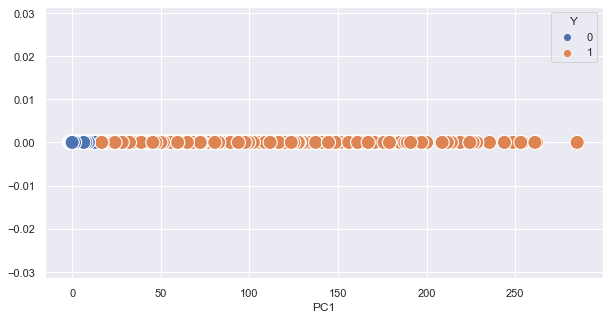

In [41]:
plt.figure(figsize=(10, 5))
sns.scatterplot (res ['PC1'], [0] * len (res), hue = res ['Y'], s = 200)

* *Luego, se exponen los datos en un espacio 2D:*

C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


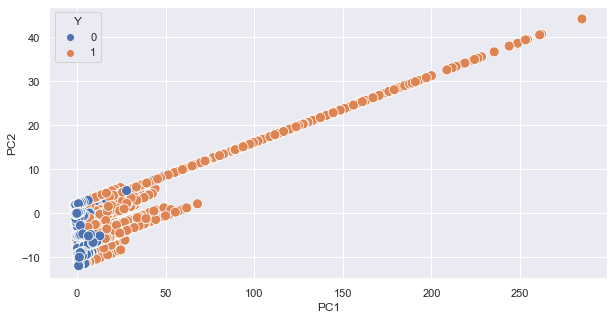

In [42]:
plt.figure (figsize = (10, 5)) 
sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=100)

* *En ambos gráficos se observa que las variables parecen relativamente fácil de separar.*
* *Casi la totalidad de las transacciones No Fraudulentas están concentradas en el PC2, mientras que las transacciones fraudulentas, se encuentran más extendidas en la dimensionalidad del PC1.*

5. Vemos cómo funciona el **modelo PCA**, con 2 componentes principales.

In [43]:
from sklearn.decomposition import PCA # Para poder realizar la reducción de dimensionalidad

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_escalado)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (594643, 6)
transformed shape: (594643, 2)


In [44]:
print(pca.components_)

[[-9.97739996e-04 -7.71986275e-04 -1.78027050e-03  1.73779020e-02
  -1.49104477e-01  9.88666325e-01]
 [-3.58305493e-03  9.79632821e-04  9.51385748e-04 -6.31924513e-02
   9.86670204e-01  1.49913038e-01]]


* *Los datos transformados se han reducido a una sola dimensión.*
* *La reducción de dimensionalidad de PCA, eliminó la información a lo largo del eje o ejes principales menos importantes, dejando solo el componente o componentes de los datos con la mayor varianza, en éste caso, el primer y segundo componente.*
* *Éste conjunto de datos de dimensión reducida es, en algunos sentidos, "lo suficientemente bueno" para codificar las relaciones más importantes entre los puntos: a pesar de reducir la dimensión de los datos, la relación general entre los puntos de datos se conserva en su mayoría.*

#### 3.2 Entrenamiento del modelo de Árbol de Decisión, una vez realizada la Reducción de Dimensionalidad

In [45]:
from sklearn.model_selection import train_test_split # Para dividir los datos en subconjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=10)

In [46]:
from sklearn.tree import DecisionTreeRegressor # Regresor deL Árbol de Decisión
from sklearn.metrics import mean_squared_error # Para cálculo del RMSE

lista_rmse_train_dt = []
lista_rmse_test_dt = []

max_depths = [1,2,3,4,5,6,7,8,9,10,20,25,30,40,50,80]

for max_depth in max_depths:

    # Se define el modelo con la profundidad deseada
    tree_regressor = DecisionTreeRegressor(max_depth = max_depth, random_state=10)
    
    tree_regressor.fit(X_train, y_train)
    
    y_train_pred = tree_regressor.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = tree_regressor.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    lista_rmse_train_dt.append(rmse_train)
    lista_rmse_test_dt.append(rmse_test)

Text(0.5, 1.0, 'Curva de Validación - Árbol de Decisión')

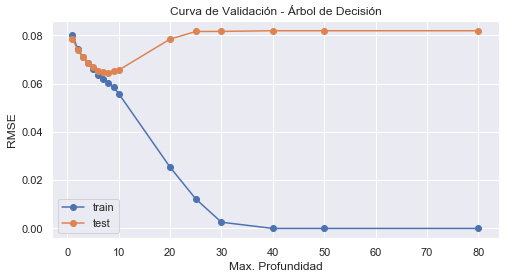

In [47]:
plt.figure(figsize = (8,4))
plt.plot(max_depths, lista_rmse_train_dt,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test_dt,'o-',label='test')
plt.legend()
plt.xlabel("Max. Profundidad")
plt.ylabel("RMSE")
plt.title('Curva de Validación - Árbol de Decisión')

In [48]:
regresor = DecisionTreeRegressor(max_depth=10, random_state=42)
regresor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

Modelo: Árbol de Decisión-PCA
Raíz del error cuadrático medio en Train: 0.05586313359928669
Raíz del error cuadrático medio en Test: 0.06506419827317063


C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


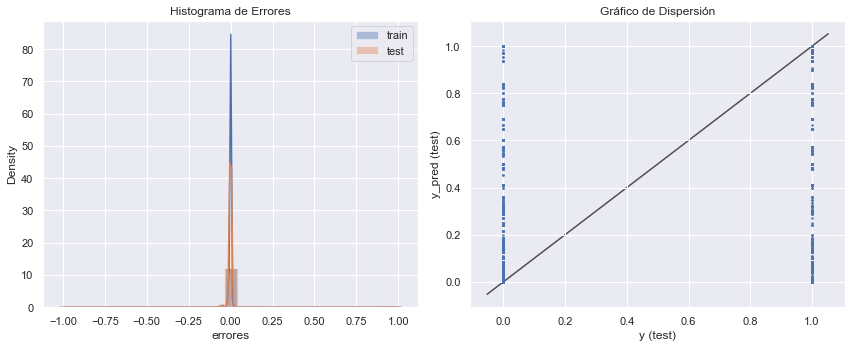

In [49]:
modelo = ['Árbol de Decisión-PCA']

for i, model in enumerate([regresor]):
    y_train_pred = model.predict(X_train).reshape(416250,1)
    y_test_pred = model.predict(X_test).reshape(178393,1)
    
    print(f'Modelo: {modelo[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (12,5))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 25, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 25, label = 'test')
    plt.xlabel('errores')
    plt.title('Histograma de Errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.title('Gráfico de Dispersión')
    
    plt.tight_layout()
    plt.show()

* *Los RMSE tanto para Train como para Test, resultan similares entre sí, y a su vez con buen desempeño.*

In [50]:
regresor.feature_importances_

array([0.74606797, 0.25393203])

* *La primer característica tiene una mayor importancia relativa a la hora de realizar predicciones (su importancia es del 75%).*

### 4. Sobremuestreo (Oversampling) con SMOTE

* *En el presente análisis, se llevará a cabo una técnica de sobremuestreo llamada SMOTE [3] (técnica de sobremuestreo de minorías sintéticas).* 
* *SMOTE creará nuevos puntos de datos de la clase minoritaria utilizando las instancias vecinas, de modo que las muestras generadas no son copias exactas, sino que son similares a las instancias que tenemos.*

1. Se **seleccionan las variables** predictoras (`X`) y la variable a predecir (`y`).

In [ ]:
X = banksim_filtrado[['age','gender','merchant','category','amount']]
y = banksim_filtrado[['fraud']]

print(X.head(),"\n")
print(y.head())

In [ ]:
y[y==1].count()

* *Vemos el desbalanceo de los datos.*

2. Aplicamos **SMOTE**.

In [ ]:
from imblearn.over_sampling import SMOTE # Importamos librería SMOTE, para poder realizar el sobremuestreo de los datos

#Transformamos el Dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
y_res = pd.DataFrame(y_res)
print(y_res.value_counts())

* *Una vez aplicado SMOTE para equilibrar el conjunto de datos, los resultados muestran que tenemos el número exacto de instancias de clase (1 y 0)*

### 5. Modelos de Machine Learning

* *__Aclaración:__ Los clasificadores basados en Árboles de decisión y los métodos de conjuntos basados en Árboles (RF, XGB) son invariantes al escalado de características (no lo requieren para converger a los errores mínimos), pero aún así, podría ser una buena idea reescalar / estandarizar su datos.*  
* *En el presente apartado, se optó por llevar a cabo el modelo de Random Forest, **sin previo escalado de los datos**.*

1. Se realiza el __Train Test Split__ para dividir el entrenamiento del test.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=42,shuffle=True,stratify=y_res)

2. Se define una función para trazar la __curva ROC_AUC__.

* *La curva ROC-AUC, es una buena forma visual de ver el performance de los modelos de clasificación a confeccionar.*

In [55]:
# Función para trazar la curva ROC_AUC

def plot_roc_auc(y_test, preds):
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('ROC curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Ratio Verdadero Positivo')
    plt.xlabel('Ratio Falso Positivo')
    plt.show()

#### 5.1 Modelo Benchmark - Árbol de Decisión

Reporte de Clasificación para Árbol de Decisión: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96    176233
           1       0.95      0.98      0.97    176233

    accuracy                           0.96    352466
   macro avg       0.96      0.96      0.96    352466
weighted avg       0.96      0.96      0.96    352466

Matriz de Confusión para Árbol de Decisión: 
 [[167405   8828]
 [  3678 172555]]


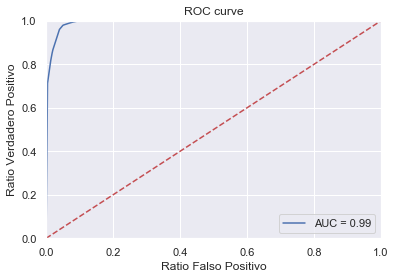

In [56]:
from sklearn.tree import DecisionTreeClassifier # Clasificador deL Árbol de Decisión
from sklearn.metrics import classification_report # Crea un informe de texto que muestra las principales métricas de clasificación
from sklearn.metrics import confusion_matrix # Calcula la matriz de confusión para evaluar la precisión de una clasificación
from sklearn.metrics import roc_curve, auc # Para visualizar la Curva ROC y el AUC
from sklearn.metrics import accuracy_score # Calcula el accuracy de una clasificación (incluído en classification_report)

tree = DecisionTreeClassifier(max_depth=4, random_state=10)

tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)


print("Reporte de Clasificación para Árbol de Decisión: \n", classification_report(y_test, y_pred))
print("Matriz de Confusión para Árbol de Decisión: \n", confusion_matrix(y_test,y_pred))
plot_roc_auc(y_test, tree.predict_proba(X_test)[:,1])

* *Vemos que un modelo simple de Árboles de Decisión, parece tener un buen desempeño, determinado principalmente en los valores obtenidos de las métricas `precision` y `accuracy`*
* *El mayor error en el que incurre el modelo, es en los `falsos negativos`, es decir en aquellas transacciones No Fraudulentas, que fueron predichas como Fraudulentas.*

In [ ]:
tree.feature_importances_

In [57]:
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Grouper and axis must be same length

* *Como se observa, la variable más importante a la hora de predecir, es `amount` por lejos.*

#### 5.2. Random Forest Classifier

* *Se elije el modelo de ML Random Forest, por ser **muy popular** para la detección de fraudes.*

* *__Random Forest__ es un tipo de algoritmo de aprendizaje automático supervisado basado en el aprendizaje por conjuntos.*
* *El aprendizaje conjunto es un tipo de aprendizaje en el que se combinan diferentes tipos de algoritmos o el mismo algoritmo varias veces para formar un modelo de predicción más potente.*
* *El algoritmo de bosque aleatorio combina varios algoritmos del mismo tipo, es decir, varios árboles de decisión , lo que da como resultado un bosque de árboles , de ahí el nombre "Random Forest" o Bosque Aleatorio.*
* *Dicho algoritmo, al igual que el Árbol de Decisión, es un **modelo de aprendizaje supervisado para clasificación**, aunque también puede usarse para problemas de regresión.*
* *No debe dejar de nombrarse su principal desventaja: debido a su complejidad, requieren mucho más tiempo para entrenarse que otros algoritmos comparables.*

##### 5.2.1 Optimización de Hiperparámetros: RandomSearch

* *El ajuste de los hiperparámetros puede ser ventajoso para crear un modelo que sea mejor en la clasificación.*
* *En el caso de Random Forest, puede no ser necesario, ya que los Bosques Aleatorios ya son muy buenos en la clasificación.*
* *Utilizar una búsqueda exhaustiva de GridSearch para elegir los valores de los hiperparámetros también puede llevar mucho tiempo.*
* *Sin embargo, en los casos en que sólo hay unos pocos valores potenciales para sus hiperparámetros o cuando su modelo de clasificación inicial no es muy preciso, podría ser una buena idea investigar al menos el efecto de cambiar algunos de los valores de hiperparámetros en su modelo.*

* *En el presente estudio, en el que el Dataset con el que trabajamos tiene un gran número de instancias, la aplicación de Gridsearch podría demorar horas, y el resultado de aplicarlo o no sería similar.*
* *Es por ello, que **a modo de demostración**, es decir, que no es realmente necesario de aplicar, se realizará una optimización de hiperparámetros a partir de RandomSearch, que también demora (unos 30 minutos aproximadamente), pero es más viable en función de los tiempos.*

* *Se puede optar por no correr la siguiente celda, ya que, los mejores hiperparámetros devueltos a partir de RandomSearch, fueron considerados en el punto `5.2.2`.*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import RandomizedSearchCV

rf_clf_rs = RandomForestClassifier(random_state=42)
n_estimators = [50,100,150,200]
max_features = ['auto', 'sqrt']
max_depth = [2,4,6,8]

param_grid = dict(max_depth=max_depth,max_features=max_features,n_estimators=n_estimators)
kfold = KFold(n_splits=2, shuffle=True, random_state=0)
ramdom = RandomizedSearchCV(estimator=rf_clf_rs,param_distributions=param_grid,verbose=1,n_iter=32,cv=kfold,n_jobs=-1)
# n_iter=32 --> The total space of parameters is 32 --> máximo de iteraciones que me permite realizar

ramdom_result = ramdom.fit(X_train, y_train.values.ravel())

In [ ]:
print("Mejores hiperparametros: "+str(ramdom_result.best_params_))
print("Mejor Score: "+str(ramdom_result.best_score_)+'\n')

##### 5.2.2 Se entrena el modelo Random Forest con los argumentos obtenidos de RandomSearch

In [ ]:
import sklearn.metrics as metrics

rf_clf_rs = RandomForestClassifier(n_estimators=50,max_features='auto',max_depth=8,random_state=42,
                                verbose=1,class_weight="balanced",oob_score=True,n_jobs=-1)

rf_clf_rs.fit(X_train,y_train.values.ravel())
y_test_pred = rf_clf_rs.predict(X_test)

print("Reporte de Clasificación para Random Forest Classifier: \n", classification_report(y_test, y_test_pred))
print("Matriz de Confusión para Random Forest Classifier: \n", confusion_matrix(y_test,y_test_pred))
plot_roc_auc(y_test, rf_clf_rs.predict_proba(X_test)[:,1])

* *El desempeño del presente modelo, ha demostrado una notable mejoría en relación al de Árboles de Decisión.*
* *El hecho de que en la curva ROC-AUC, el **AUC sea = 1**, expone que el valor diagnóstico es perfecto.* 

In [ ]:
y_test_pred = rf_clf_rs.predict(X_test)
y_train_pred = rf_clf_rs.predict(X_train)

In [ ]:
print('Accuracy sobre el train set: ', metrics.accuracy_score(y_train, y_train_pred)) # Accuracy Asociado al Train
print('Accuracy sobre el test set: ', metrics.accuracy_score(y_test, y_test_pred)) # Accuracy Asociado al Test

* *Además, tenemos en éste caso, **bajo sesgo** y **baja varianza**, ya que el desempeño es bueno tanto en el train como en el test.*
* *Ésto es precisamente lo que se busca en un modelo, por lo que el presente escenario es muy favorable, ya que la complejidad resulta ser la justa y necesaria.*

In [ ]:
importances = rf_clf_rs.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

* *La variable más importante a la hora de predecir sigue siendo `amount`, aunque ahora adquieren notable relevancia las atributos de `category` y `merchant`.*

### 6. Comparación del Desempeño de los Modelos Desarrollados

|      Modelos      | Precision No Fraude | Precisión Fraude |            Hiperparámetros Utilizados           |
|:-----------------:|:-------------------:|:----------------:|:-----------------------------------------------:|
| Árbol de Decisión |         0.98        |       0.95       |         max_features=none,max_depth=4           |
|   Random Forest   |         0.99        |       0.97       | n_estimators=50,max_features='auto',max_depth=8 |

* *En éste caso, fue **Random Forest fue el modelo con mejor desempeño**.*
* *Éste resultado, era realmente el esperado, ya que se trata de un algoritmo eficiente y fácil de usar que ofrece un alto rendimiento y precisión en comparación con otros algoritmos.*
* *Random Forest, además de aplicar Bagging, también selecciona features al azar, de esa manera descorrelaciona aún más los distintos modelos de árbol creados.*
* *Cuenta con una **doble aleatoriedad**: tanto en la selección del valor k de características para cada árbol como en la cantidad de muestras que usa para entrenar cada árbol creado.*
* *El algoritmo de bosque aleatorio **no está sesgado** (lo cual coincide con lo observado anteriormente), ya que hay varios árboles y cada árbol se entrena en un subconjunto de datos. Básicamente, el algoritmo de bosque aleatorio se basa en el poder de "la multitud"; por lo tanto, se reduce el sesgo general del algoritmo.*

__¿Cuál es el beneficio de usar Random Forest versus Árboles de Decisión?__
* *Los bosques aleatorios son una opción más robusta que un simple árbol de decisión.*
* *Como Random Forest consiste en una colección de árboles en un subconjunto aleatorio de características, tiene como predicciones finales, los resultados combinados de esos árboles.*
* *Éste algoritmo **es muy estable**. Incluso si se introduce un nuevo punto de datos en el conjunto de datos, el algoritmo general no se ve muy afectado, ya que los nuevos datos pueden afectar a un árbol, pero es muy difícil que afecte a todos los árboles.*
* *Random Forest **previene el sobreajuste la mayoría de las veces**, creando subconjuntos aleatorios de las características y construyendo árboles más pequeños usando estos subconjuntos. Después, combina los subárboles de submuestras de características, por lo que no tiende a sobreajustarse a todo su conjunto de características de la manera en que lo hacen los Árboles de Decisión.*

|      Modelo Parte A     | RMSE Train | RMSE Test | Hiperparámetro Utilizado |
|:-----------------------:|:----------:|:---------:|:------------------------:|
| Árbol de Decisión (PCA) |    0.055   |   0.065   |      max_depth = 10      |

* *Por otro lado, el modelo de **Árbol de Decisión habiendo aplicado PCA**, posee igualmente, una buena capacidad de predicción, por el hecho de haber realizado reducción de dimensionalidad, pasando de 6 features a 2 estimadores.*
* *No se observa en éste caso sobrejuste, ya que los RMSE obtenidos para Train y Test son similares.*
* *Sin embargo, la casi perfección en la predicción de Random Forest, dejó un paso atrás a éste modelo.*

### 7. Conclusión

* En el presente estudio se buscó realizar la Detección de Fraudes en los datos de pago de nuestro banco elegido, denominado Banksim.
* Como el conjunto de datos de Fraude del Dataset utilizado, tiene un gran problema de desequilibrio, se realizó una técnica de sobremuestreo llamada SMOTE para generar nuevos puntos de datos de la clase minoritaria y así equilibrar las instancias con transacciones fraudulentas y no fraudulentas.
* Para la Detección, se llevaron a cabo distintos modelos de ML, habiendo alcanzado muy buenos resultados con los clasificadores elegidos, entre otras razones, por haberse elegido entre ellos el modelo de Random Forest, el cual es muy popular y efectivo a la hora de detectar Fraudes Bancarios.
* La razón por la cual elegí trabajar con 'Fraude Bancario' para mi Trabajo Final, es que por un lado, soy economista, trabajo en un banco en el sector de Riesgo Crediticio y considero muy enriquecedor lograr detectar de forma rápida y precisa, la existencia de fraudes, para evaluar luego si es necesario hacer un mayor seguimiento a ciertos tipos de transacciones, o bloquear las mismas. Por otro lado, es sorprendente la cantidad de ingresos que pierden todo tipo de empresas debido a ello, y es realmente atrapante intentar al menos, poder participar para mejorar dicha situación a futuro.

### 8. Recursos

[1]. Encuesta Global de Fraude Bancario 2019 - KPMG (Mayo 2019). Obtenido de https://home.kpmg/cr/es/home/tendencias/2019/07/fraude_bancario.html  
[2]. Synthetic data from a financial payment system. Obtenido de https://www.kaggle.com/ntnu-testimon/banksim1  
[3]. SMOTE: Synthetic Minority Over-sampling Technique. Obtenido de https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/